# The `ExplorationAgent` class#


In the previous file we saw how to create a specification MDP and perform random actions on that to generate an exploration tree. However in this notebook we show an implementation of an explorer agent class that allows us to define arbitrary learning functions to learn a policy for the specification MDP. Lets begin by importing all the important modules

In [1]:
from SpecificationMDP import *
from Exploration import *
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [32,32]

# Importing all the relevant specification data
PathToDataFile = ''
SampleSignal = Constants.ImportSampleData(PathToDataFile)
TraceSlice = GetTraceSlice(SampleSignal,0)
Formulas, Prob = Constants.ImportCandidateFormulas()
idx = np.argsort(Prob)[::-1]
Formulas_synth = np.array(Formulas)[idx]
Probs = np.array(Prob)[idx]
ProgressedFormulas = np.array([ProgressSingleTimeStep(formula, TraceSlice) for formula in Formulas_synth])

# Define the MDP problems

specification_fsm = SpecificationFSM(ProgressedFormulas, Probs, reward_type='chance_constrained', risk_level=0.3)
control_mdp = SyntheticMDP(5,4)
MDP = SpecificationMDP(specification_fsm, control_mdp)



The base class is a class called `ExplorationAgent`. This agent has a fairly simple uniform random exploration policy. However the constructor for this class allows us to use any exploration policy function as its input. Here we initialize the agent with the default policy on this MDP class

In [2]:
explorer = ExplorerAgent(MDP)

Now we run random exploration for 1000 exploration episodes and plot the exploration graph.


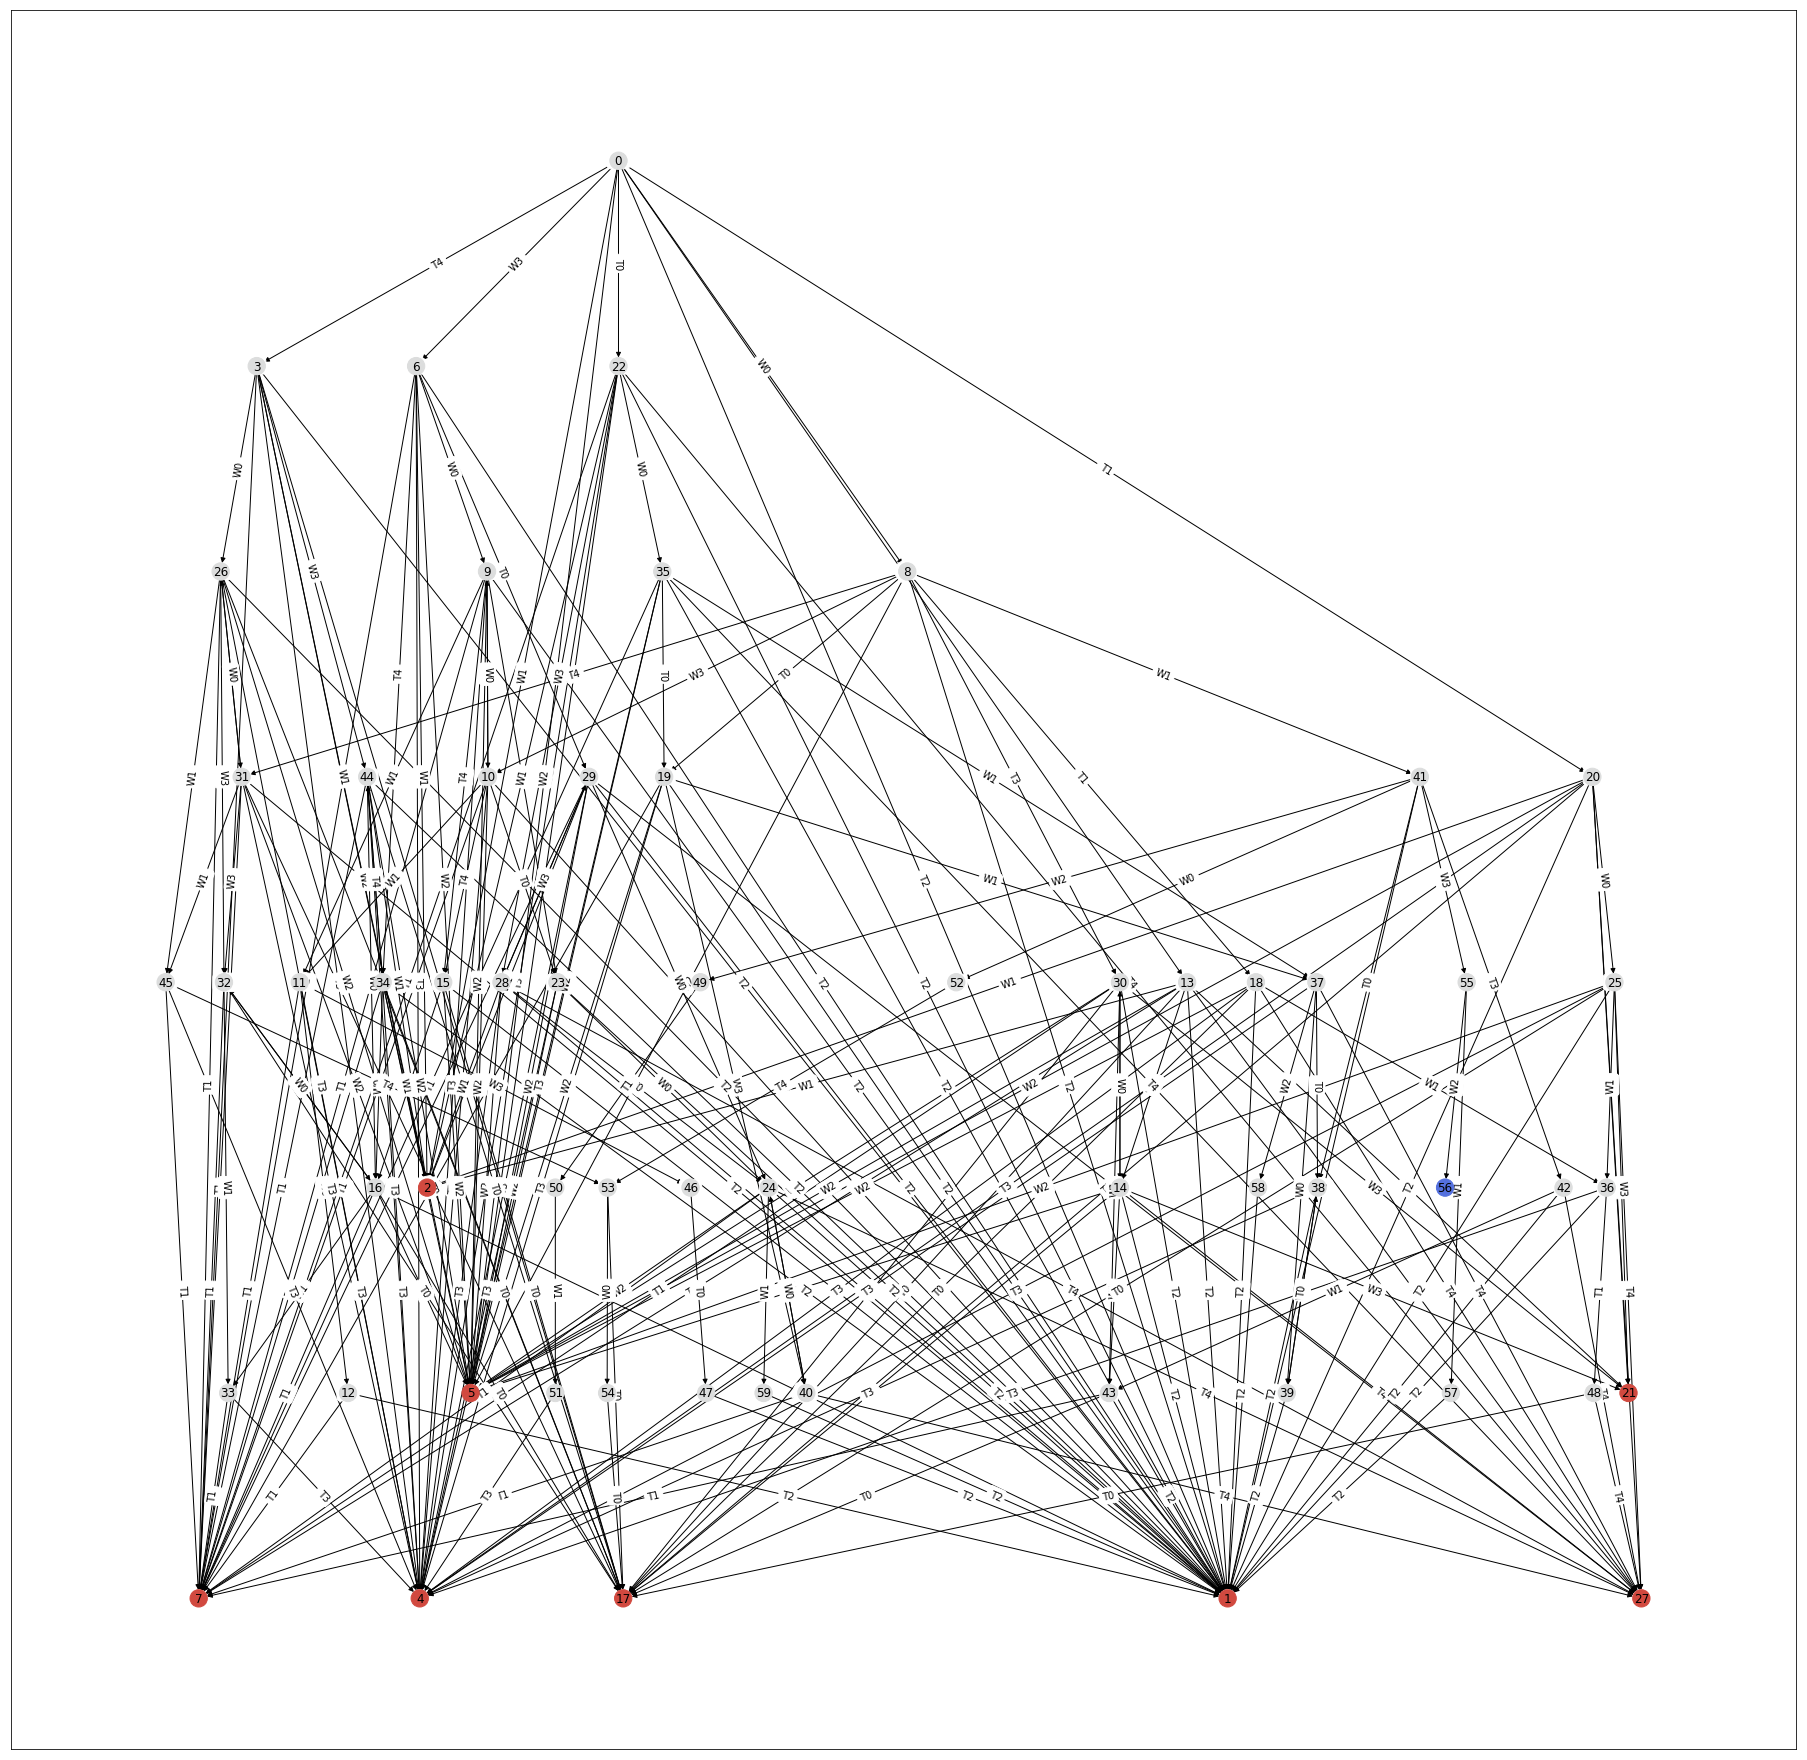

In [3]:
actions, episodes = explorer.explore(episode_limit = 1000, action_limit = 10000)
_ = explorer.visualize_exploration()

Note that if you run the explorer again, this run will add to the original tree

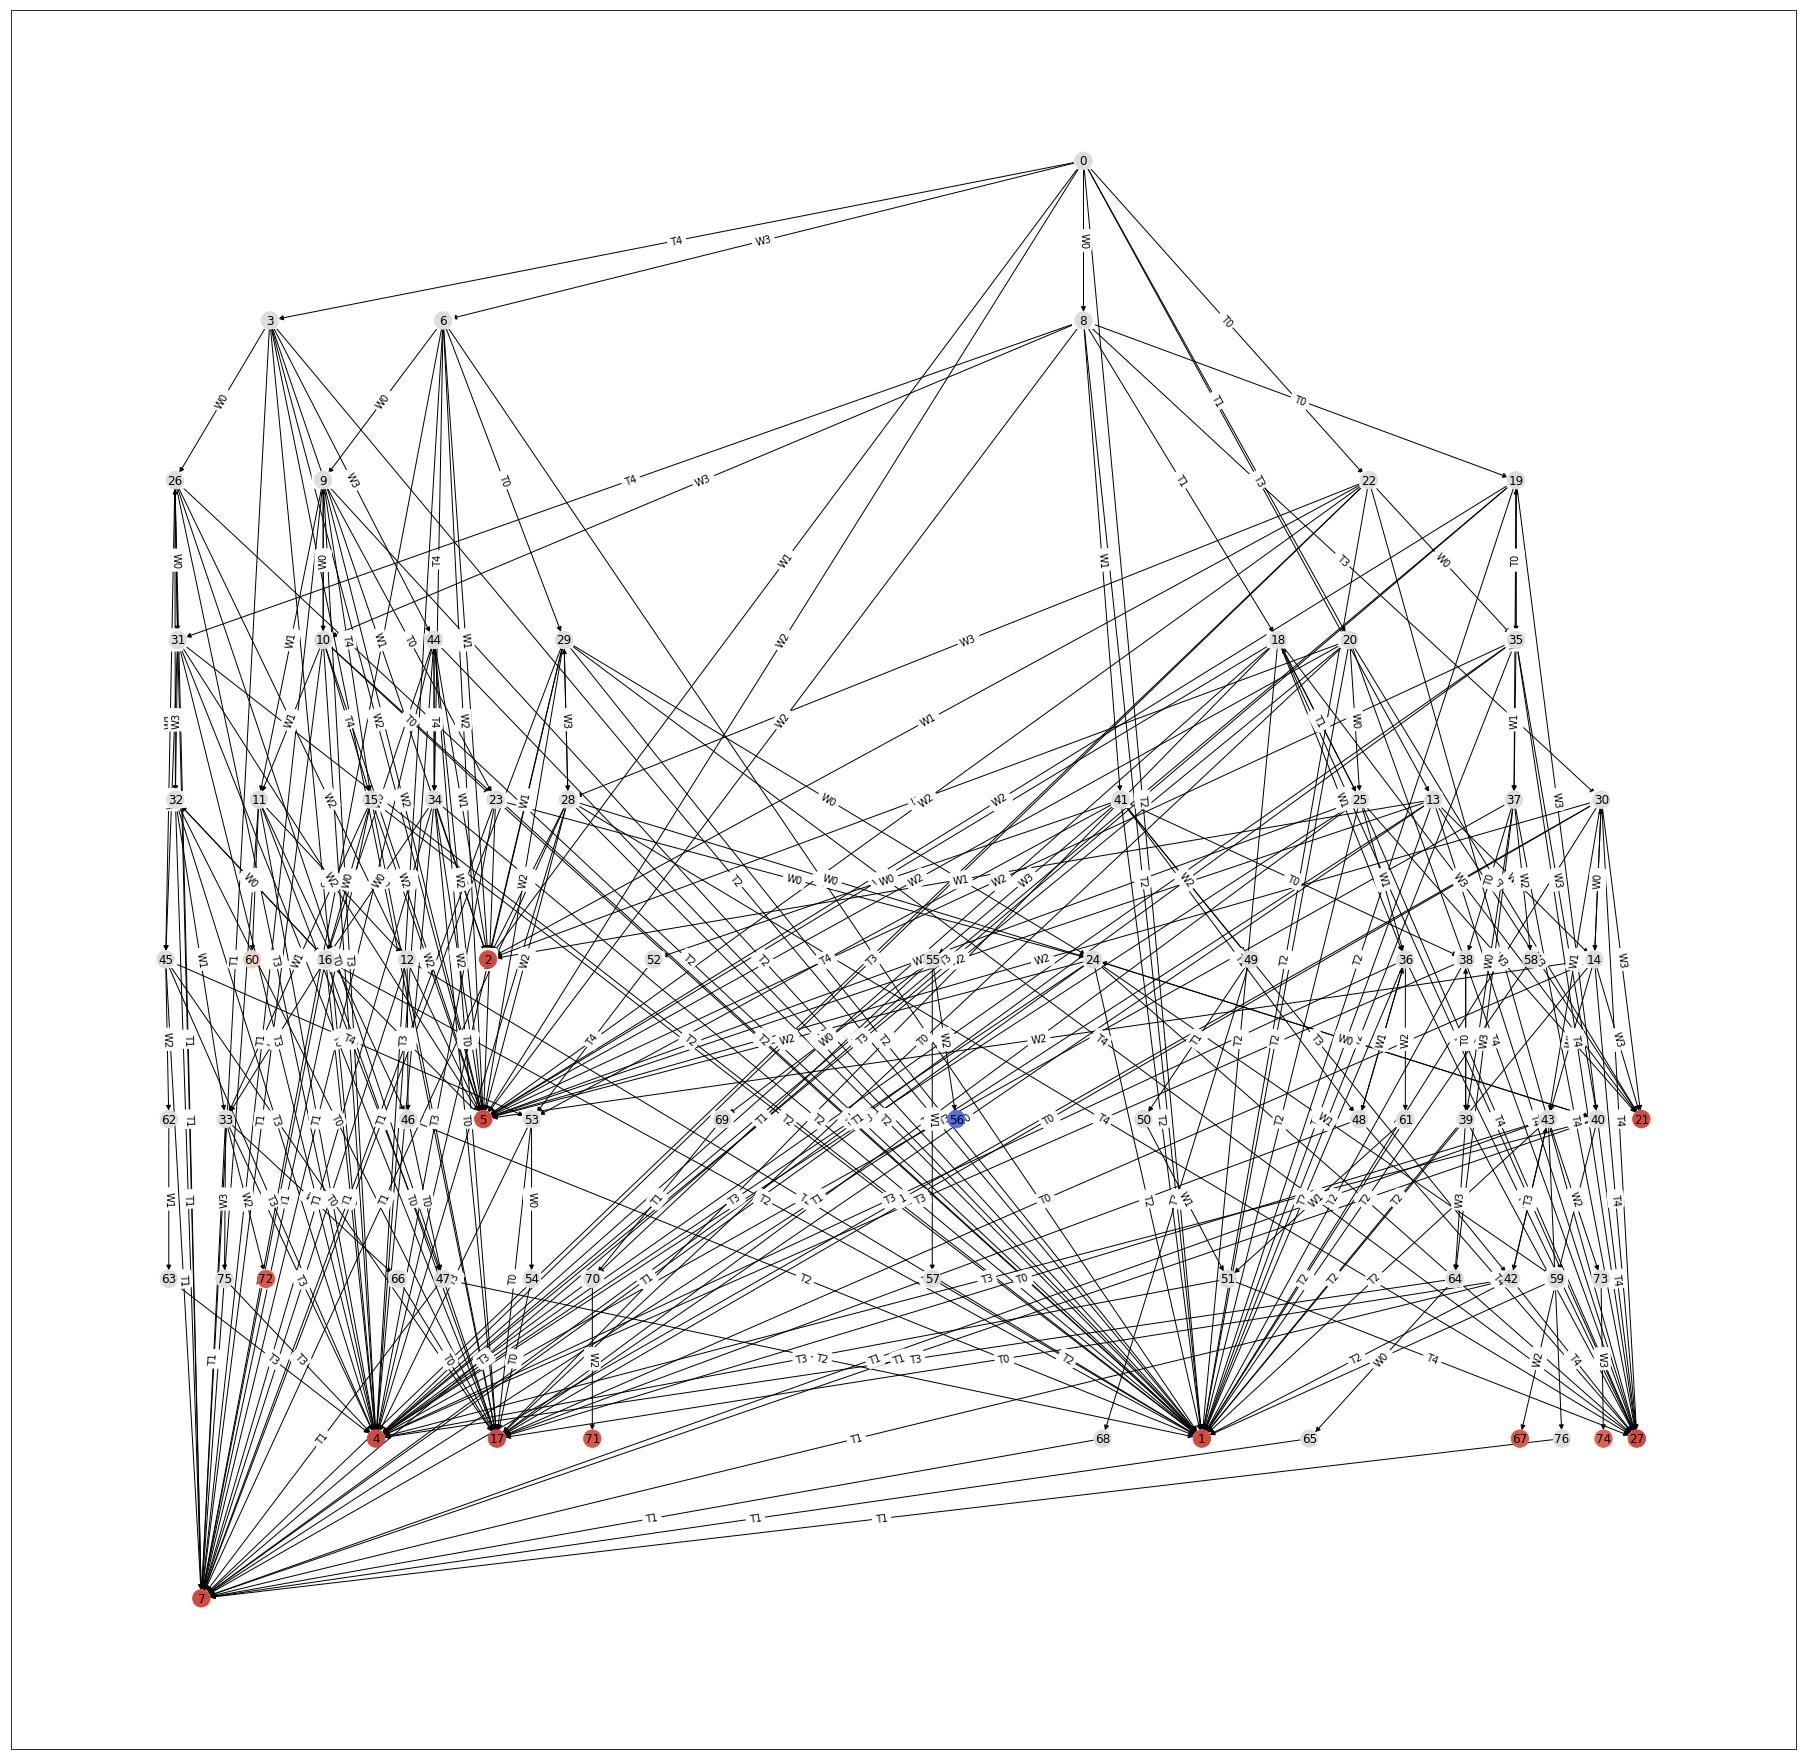

In [4]:
actions, episodes = explorer.explore(episode_limit = 1000, action_limit = 10000)
_ = explorer.visualize_exploration()

And yet again

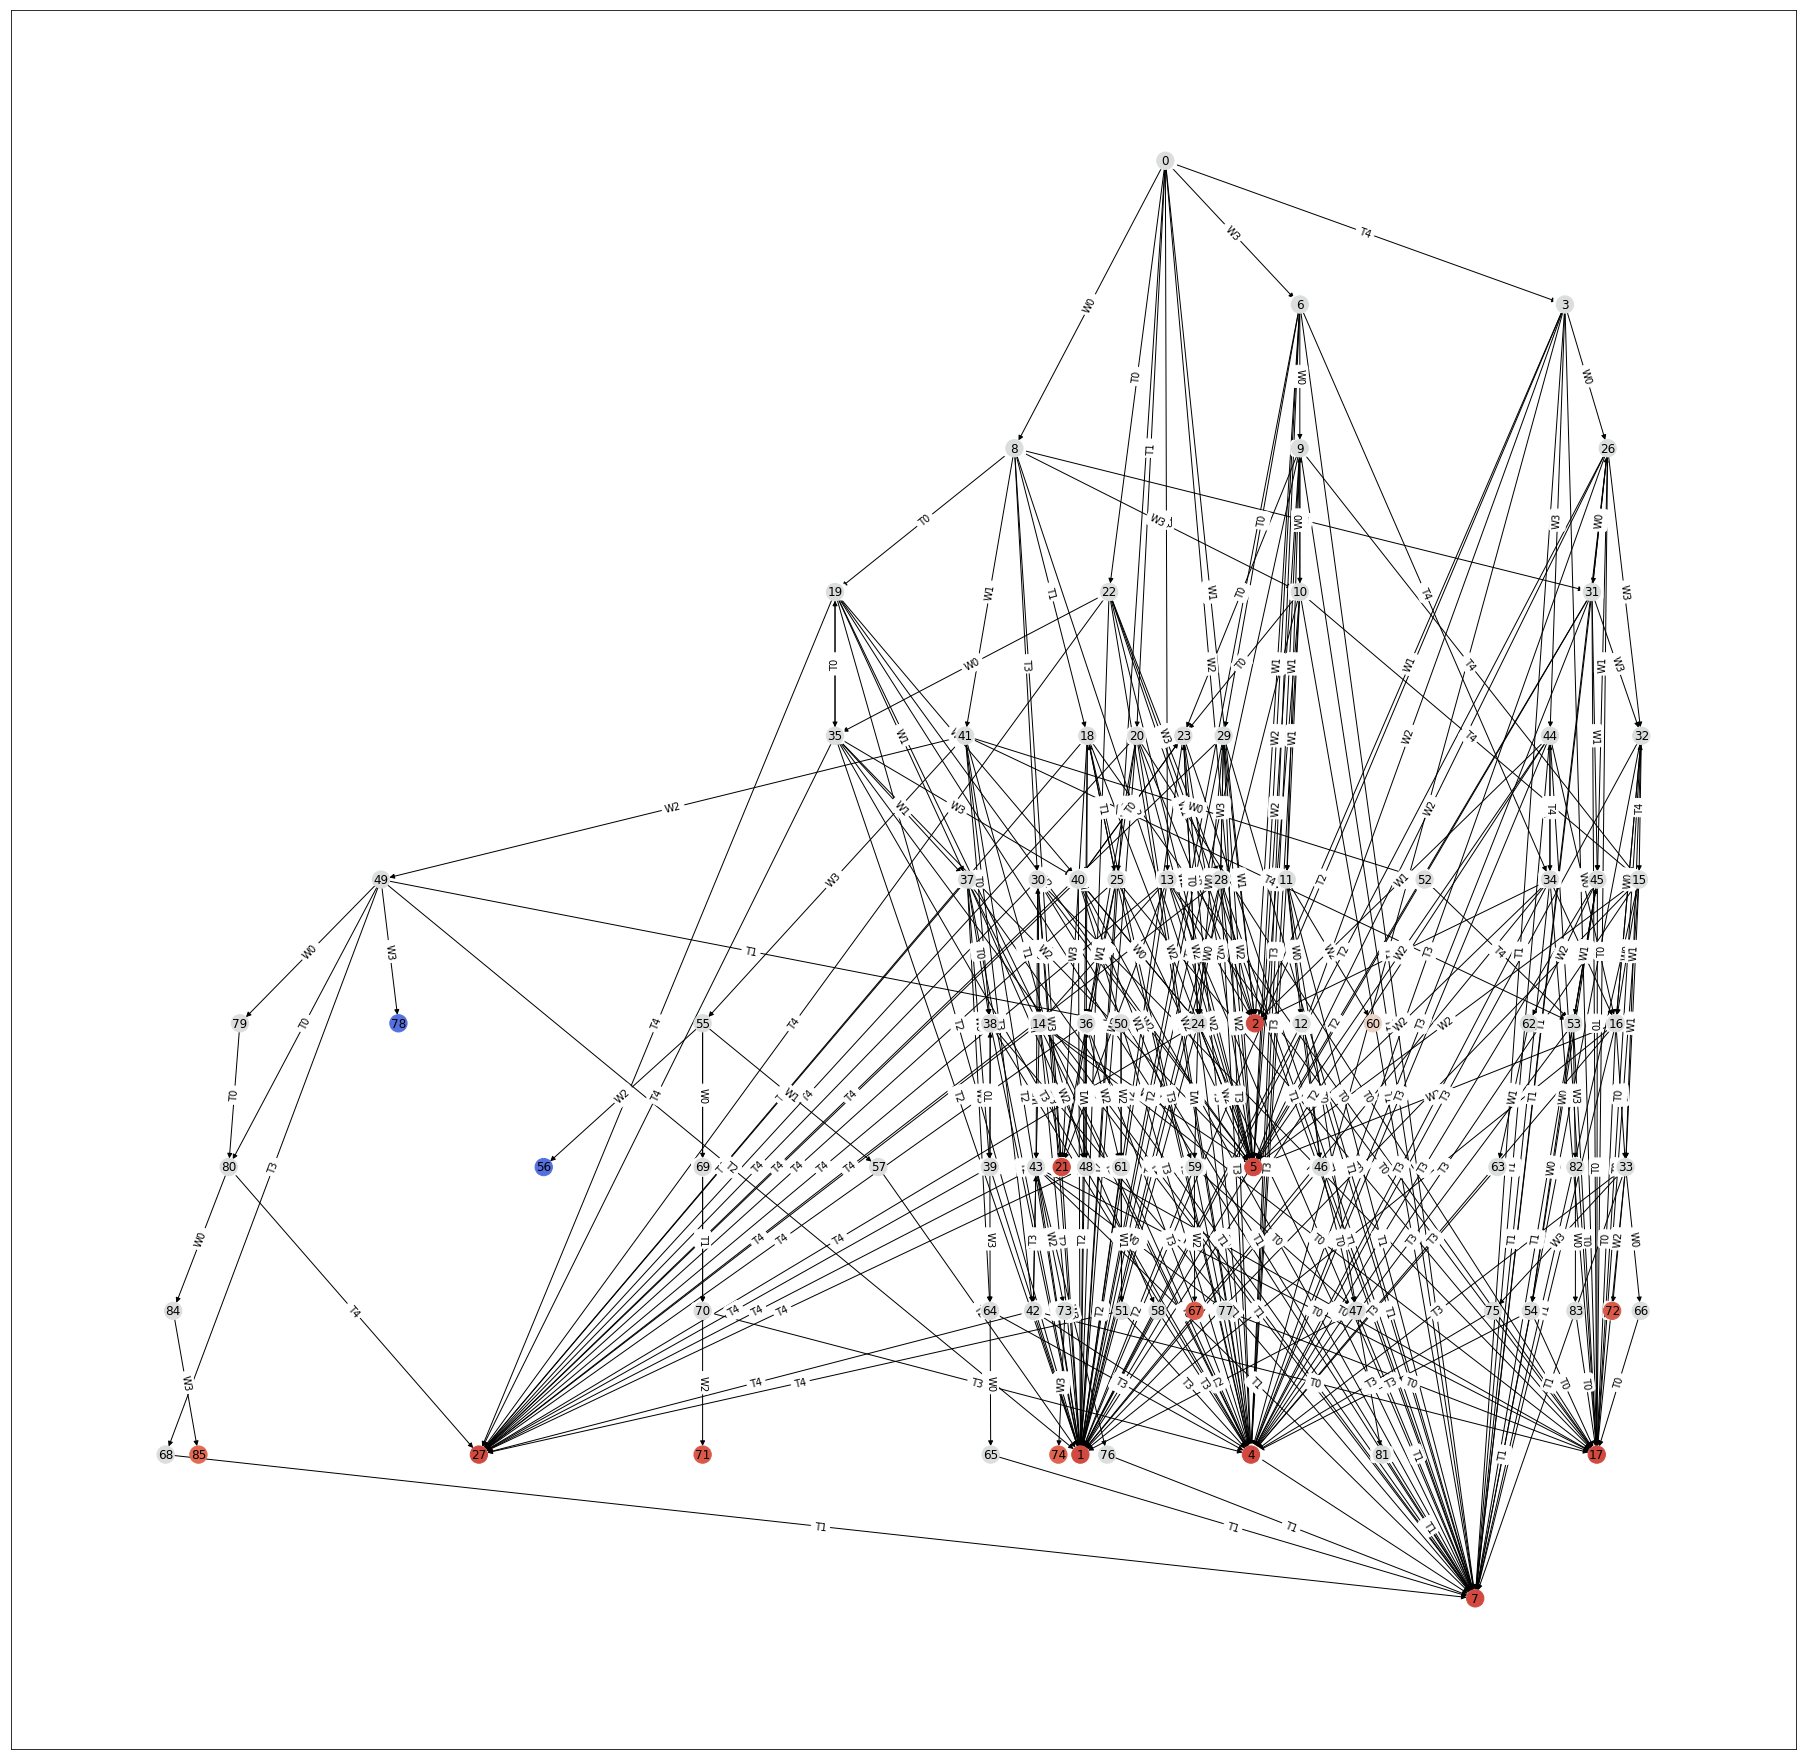

In [5]:
actions, episodes = explorer.explore(episode_limit = 1000, action_limit = 10000)
_ = explorer.visualize_exploration()

Now lets define a policy that only goes to the waypoints and never to the threats

In [27]:
def create_policy(MDP:SpecificationMDP):
    
    def policy(state):
        available_actions = MDP.get_actions()
        p0 = [0]*5 + [1]*4
        pnorm = np.array(p0)/np.sum(p0)
        action = np.random.choice(available_actions, p = pnorm)
        return action
    return policy

custom_policy = create_policy(MDP)

Now lets define a new explorer agent with the custom policy

In [28]:
explorer_custom = ExplorerAgent(MDP, input_policy = custom_policy)

Now lets see what the outcome of the custom policy is over 1000 iterations

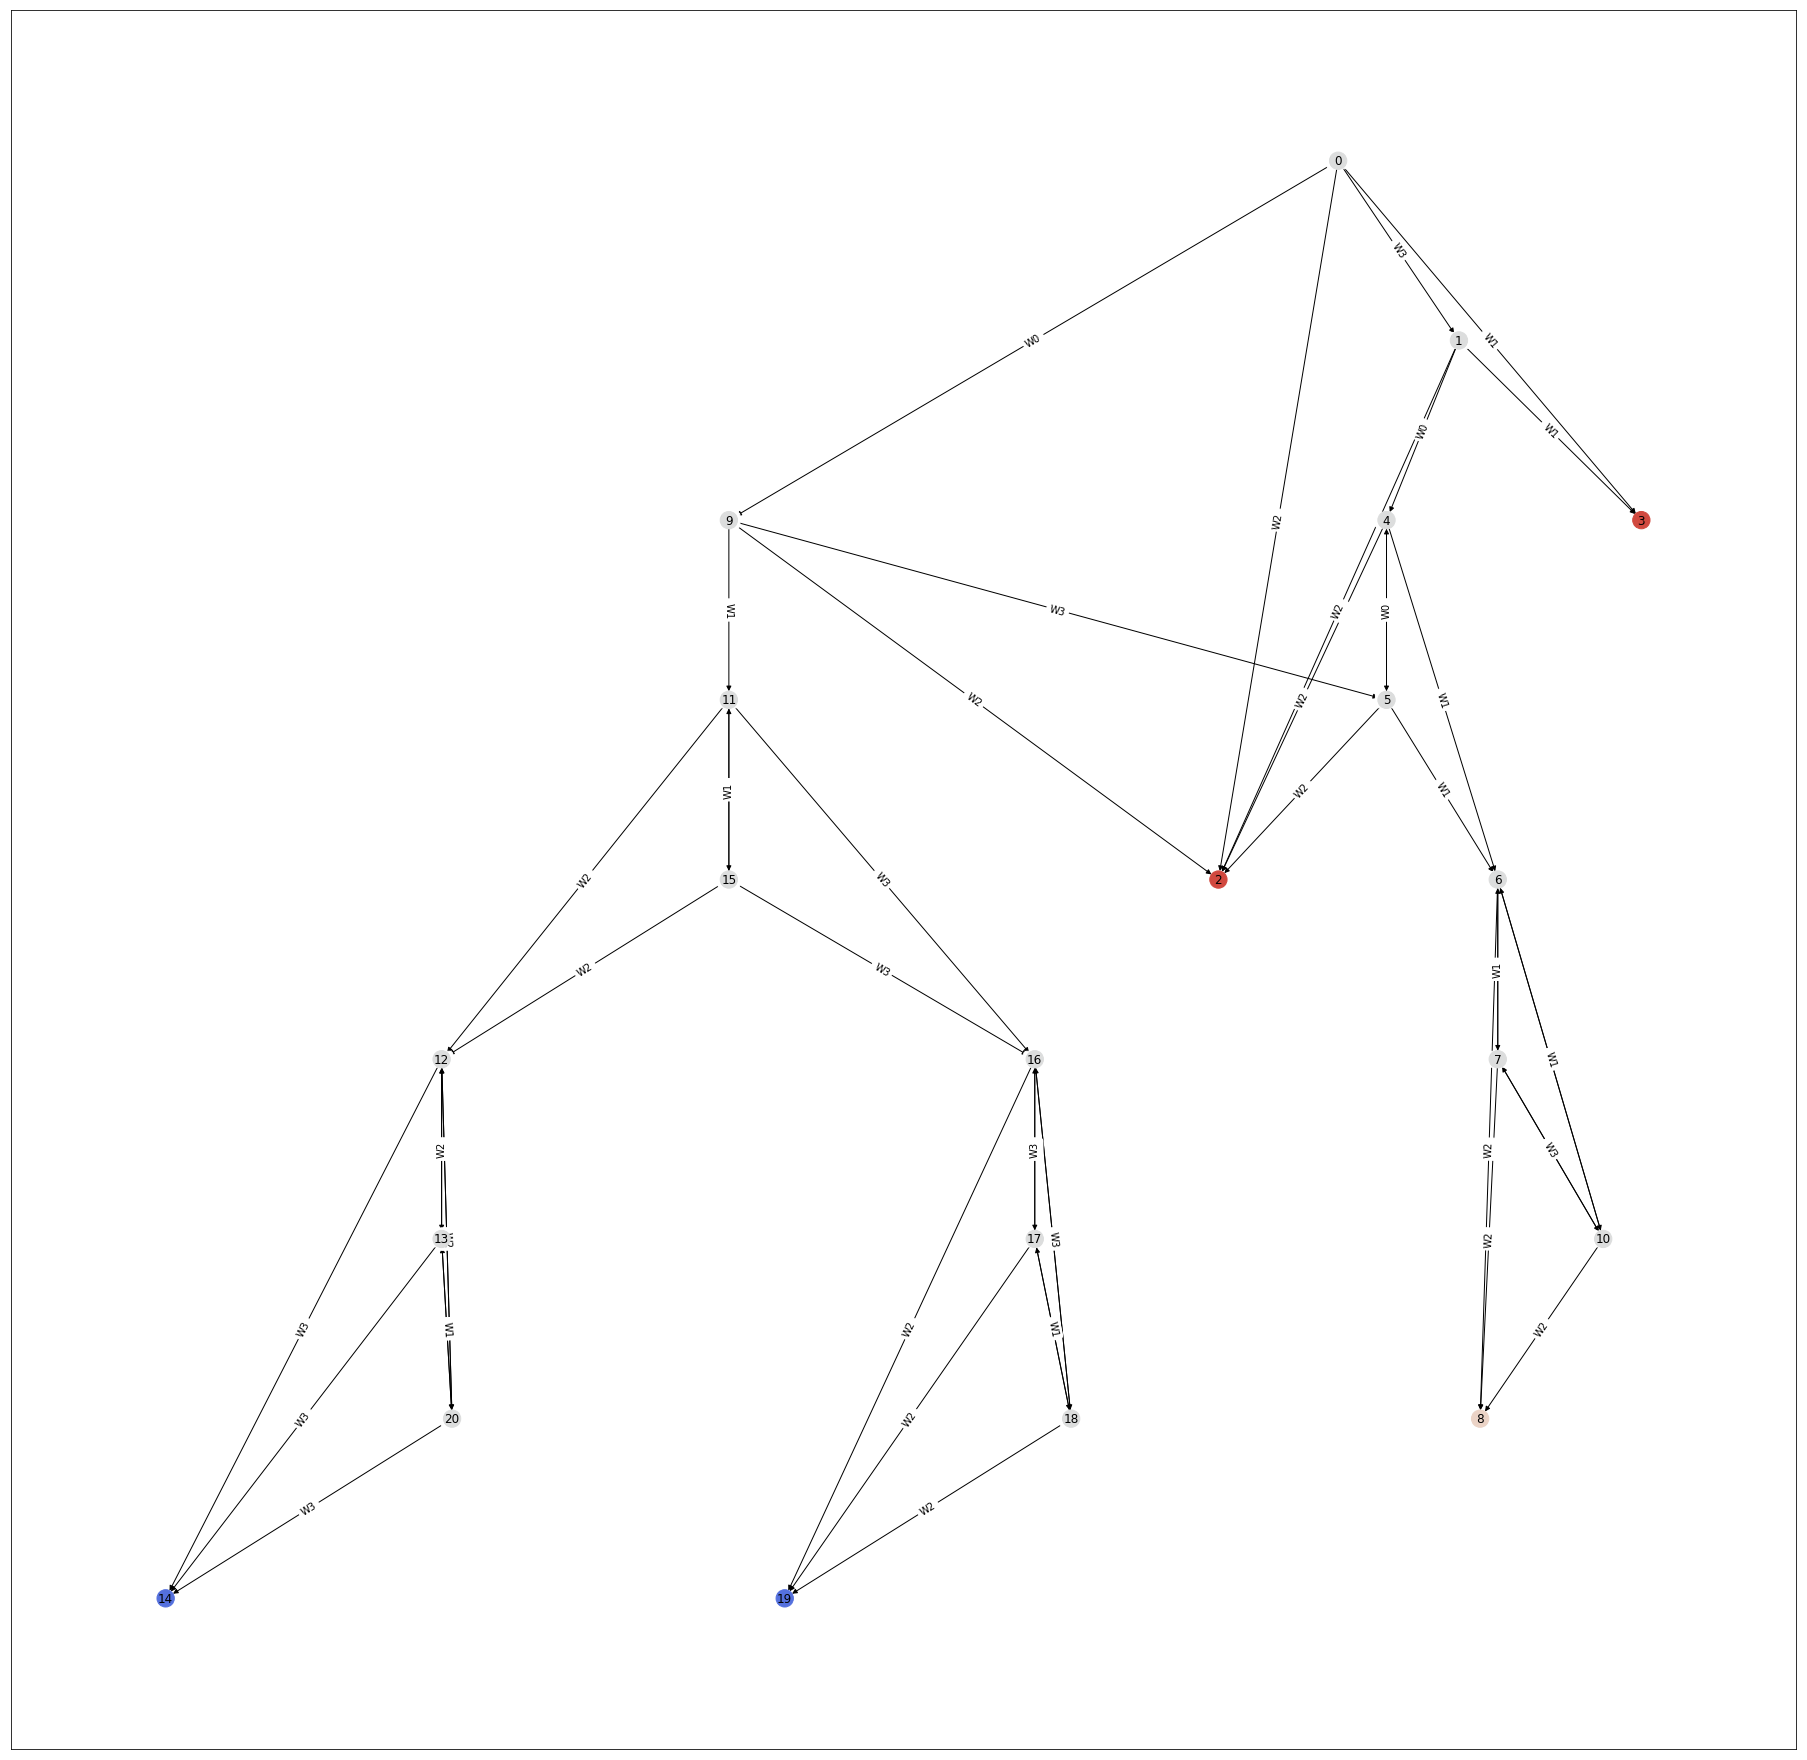

In [30]:
_ = explorer_custom.explore(episode_limit = 1000)
_ = explorer_custom.visualize_exploration()


Note how the exploration tree is much smaller and does not contain many terminal states and the ones that it does see are positive almost as often as they are negative. Lets run this exploration once again for a 1000 episodes

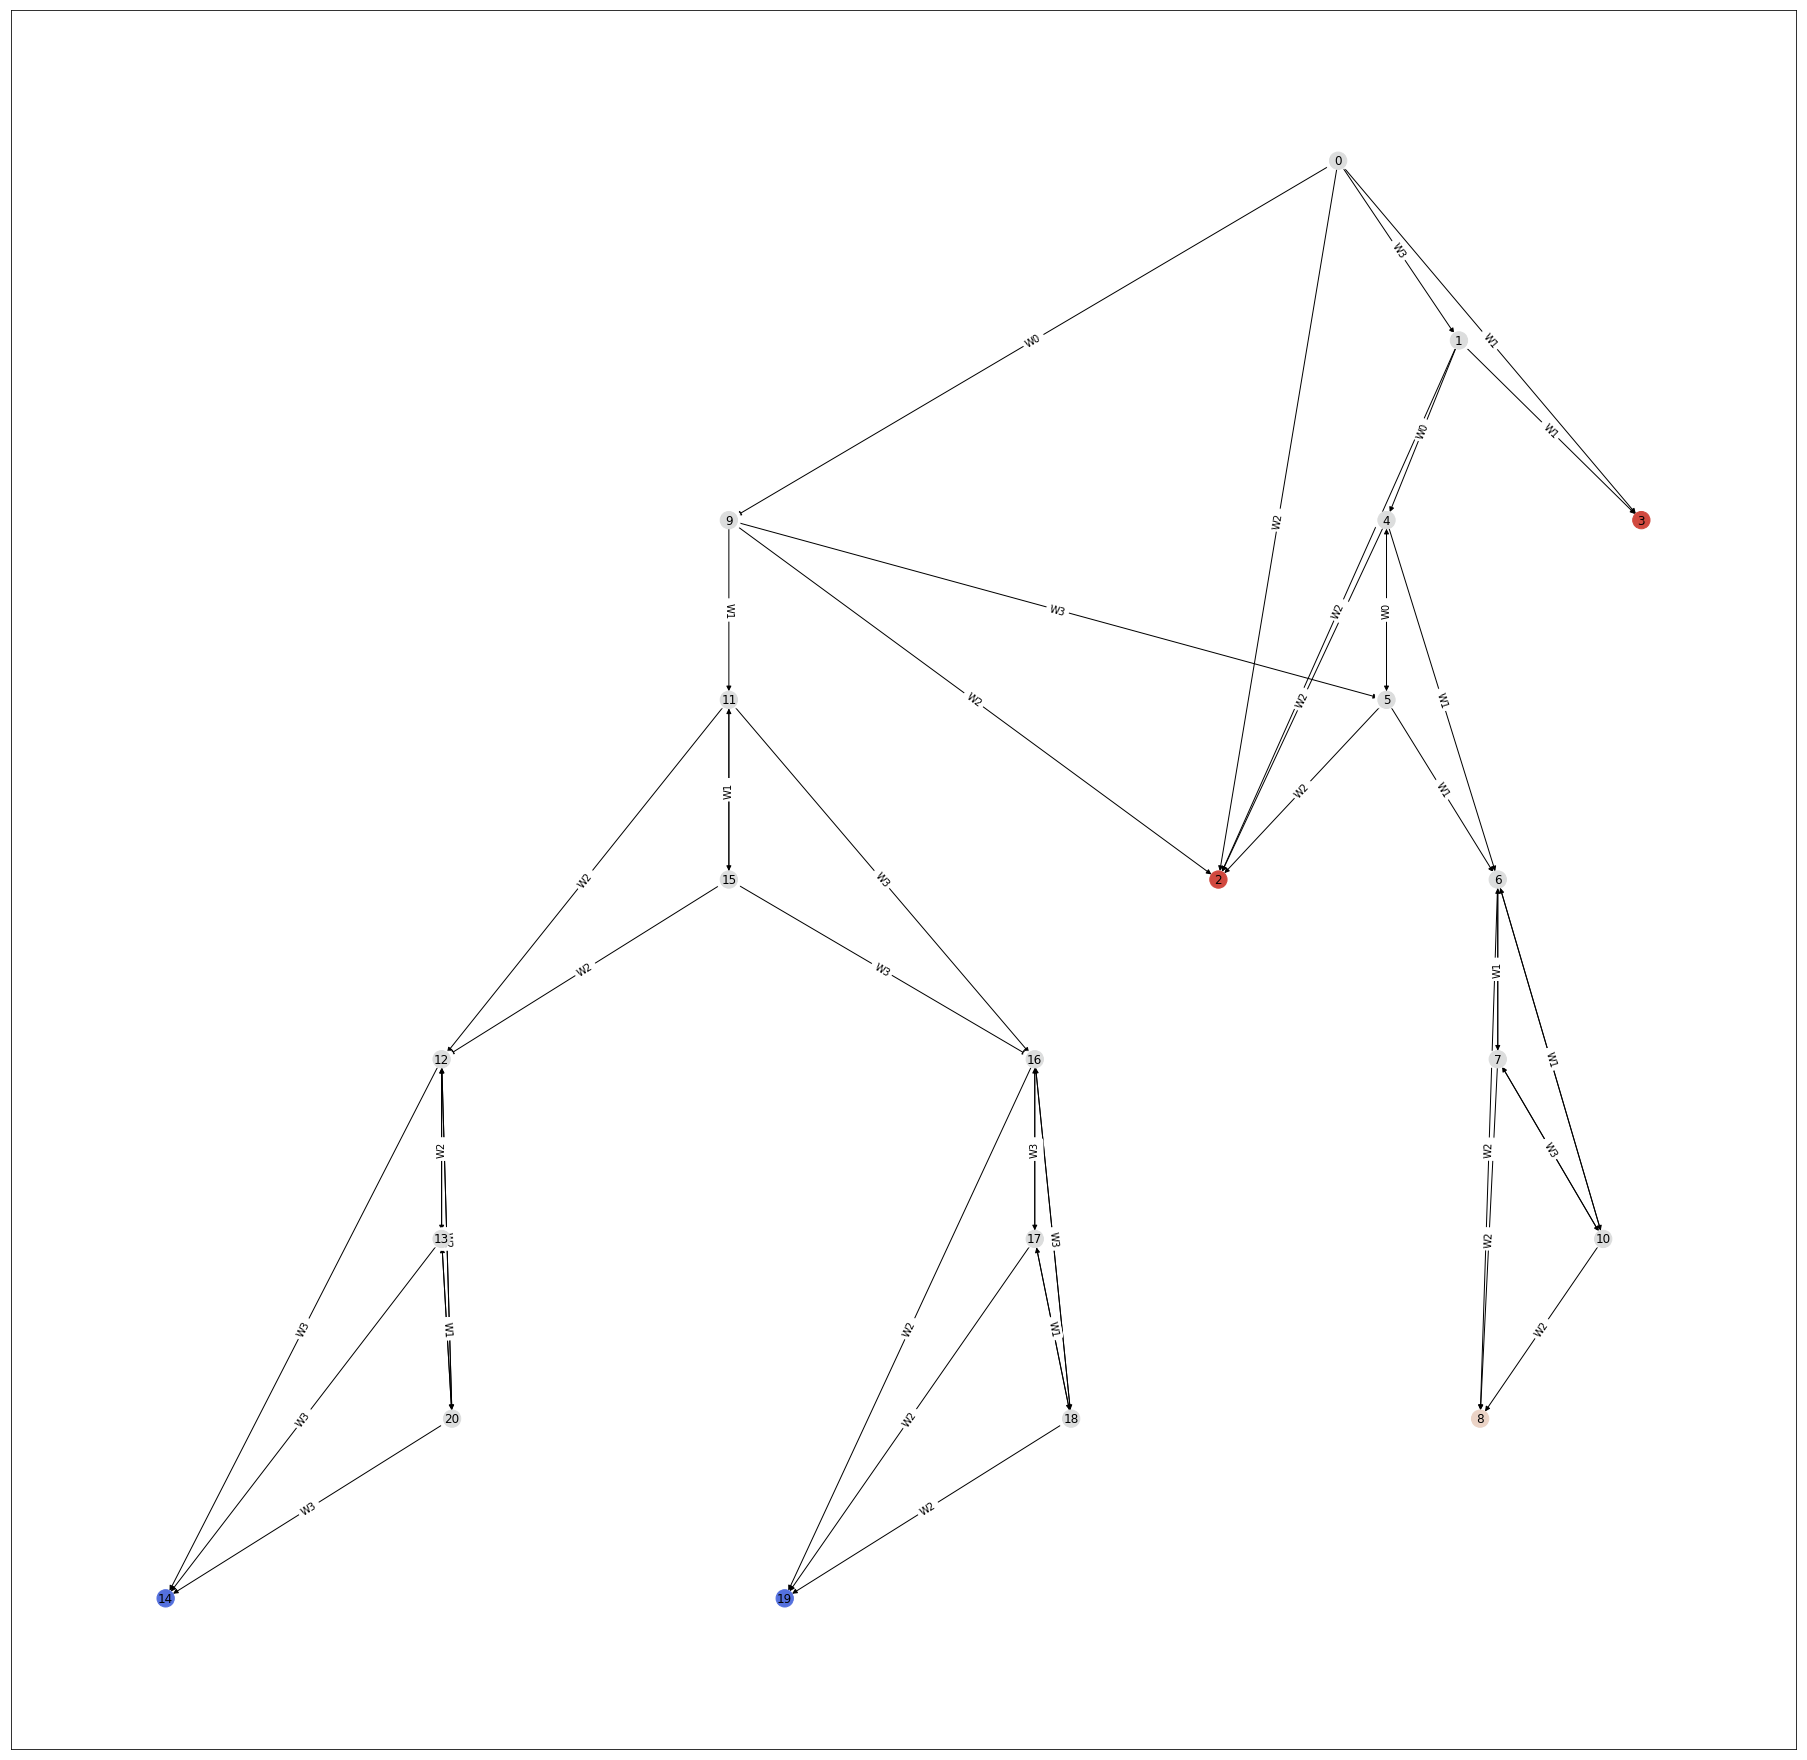

In [32]:
_ = explorer_custom.explore(episode_limit = 3000)
_ = explorer_custom.visualize_exploration()


And now lets looks at another agent with a smaller but non-zero probability of going to to one of the threats

In [38]:
def create_policy2(MDP:SpecificationMDP):
    
    def policy(state):
        available_actions = MDP.get_actions()
        p0 = [0.01]*5 + [1]*4
        pnorm = np.array(p0)/np.sum(p0)
        action = np.random.choice(available_actions, p = pnorm)
        return action
    return policy

custom_policy2 = create_policy2(MDP)

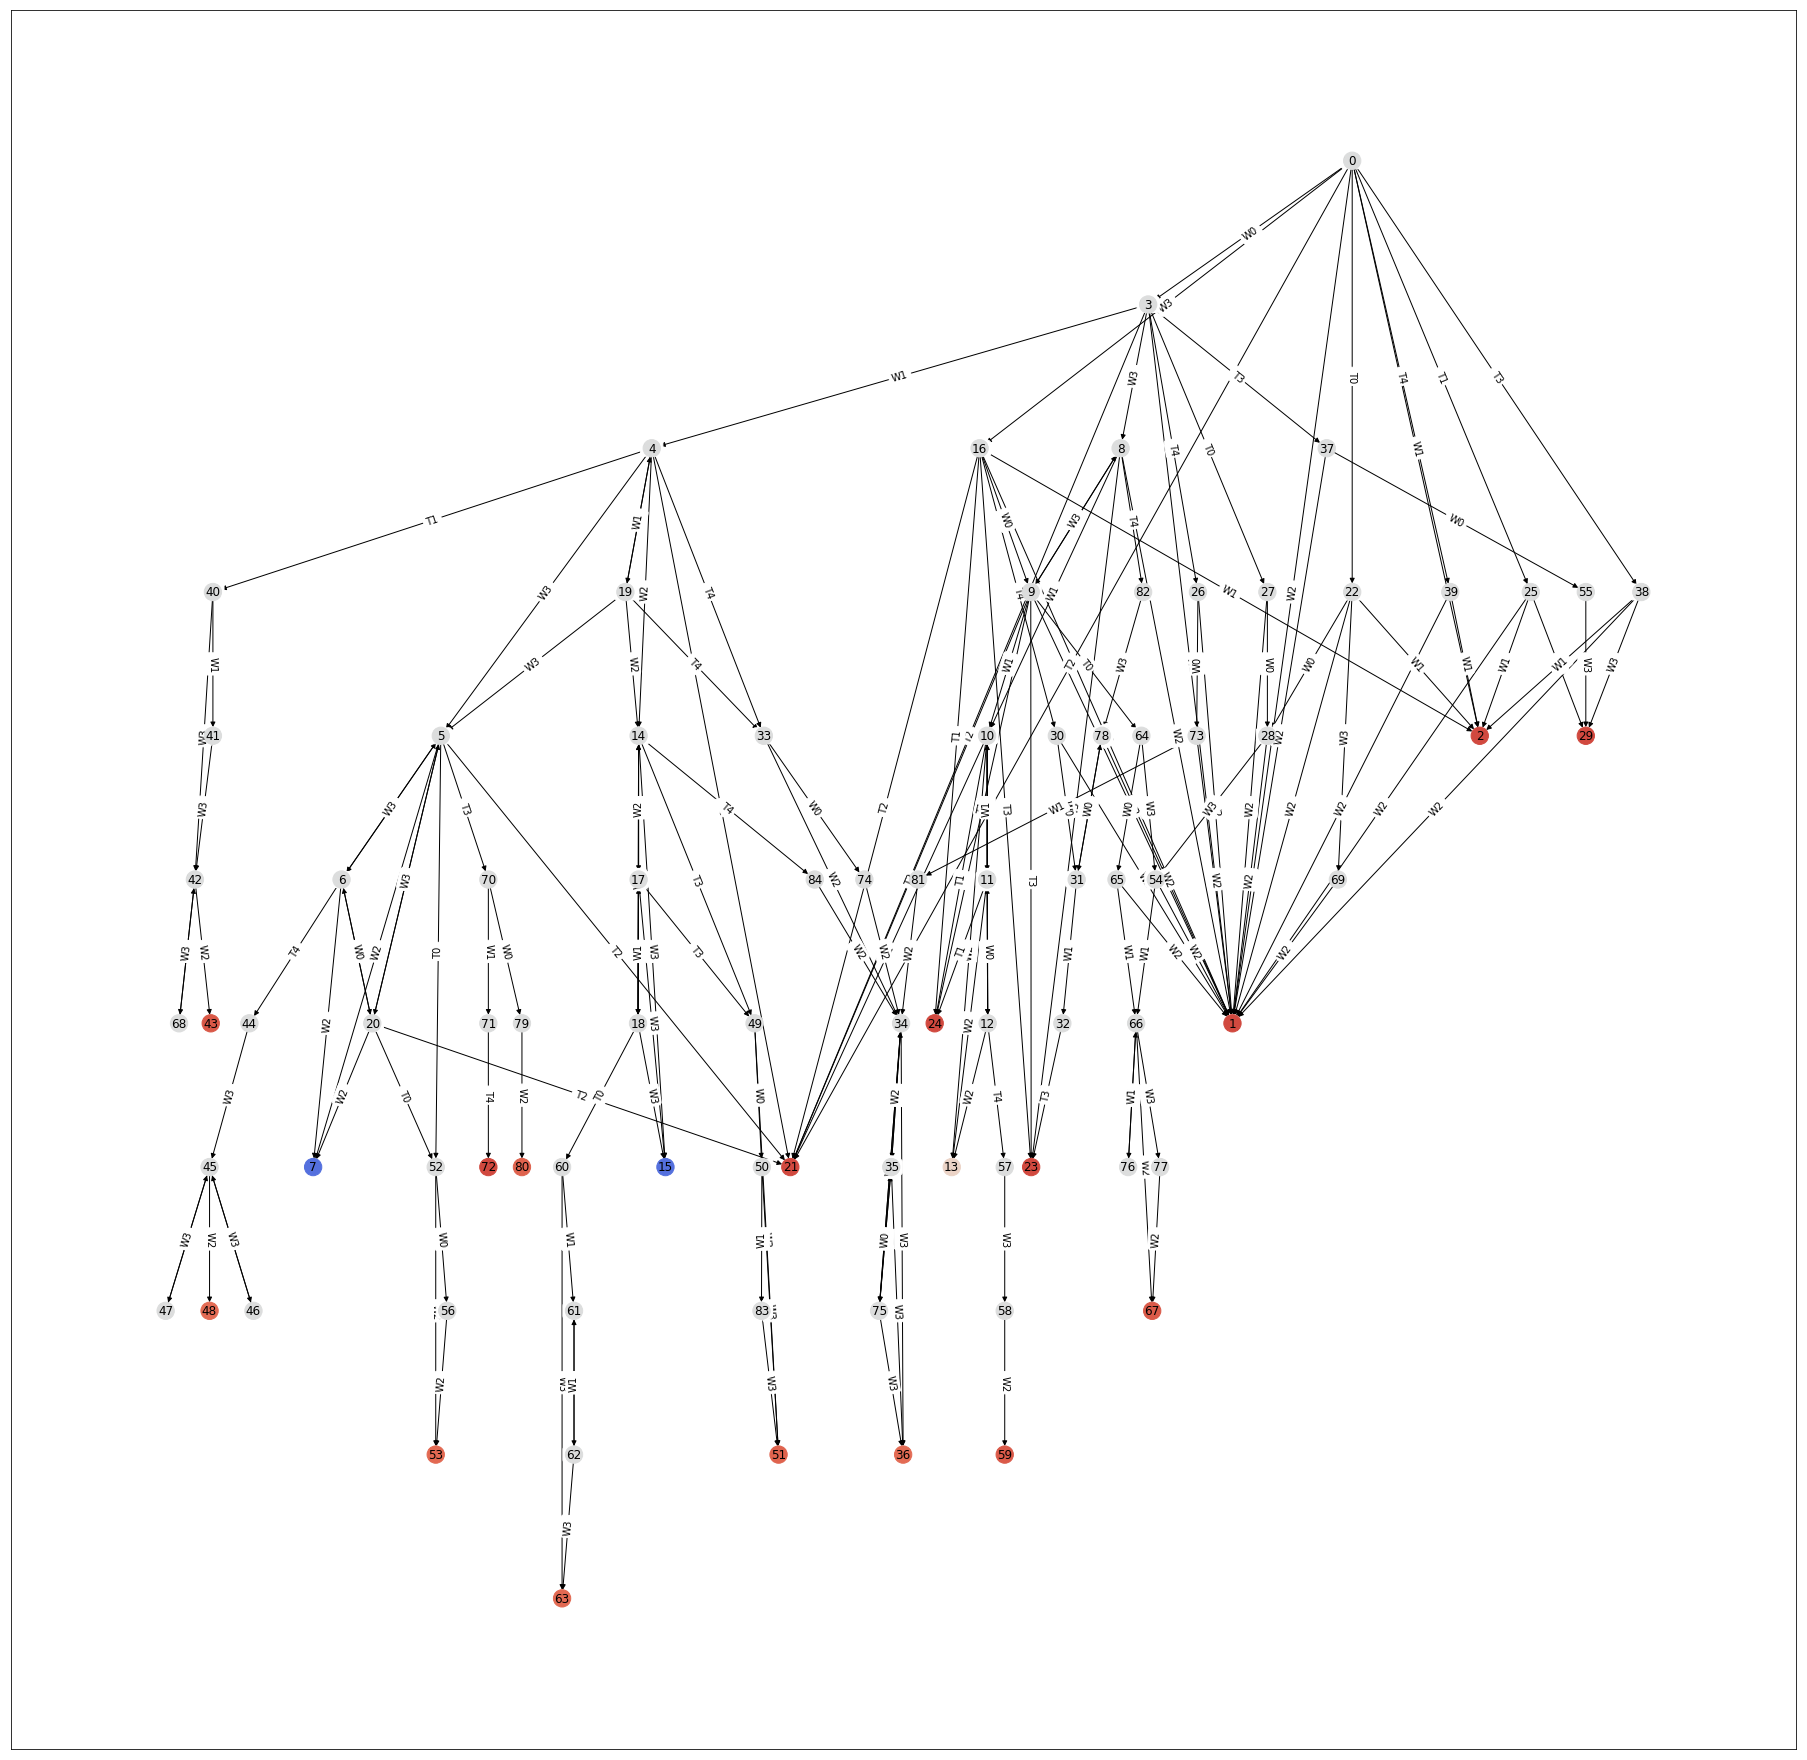

In [39]:
explorer_custom2 = ExplorerAgent(MDP, input_policy = custom_policy2)
_ = explorer_custom2.explore(episode_limit = 5000)
_ = explorer_custom2.visualize_exploration()